# Math Workshop 2025 - Statistics in Practice
Helen Zhang (jiz053@ucsd.edu)

Contents: 
* Rolling Dice - Random variables and review 
* Central Limit Theorum
* Variance, Standard Deviation, Standard Error
* Sea Surface Temperature 

Now that we have a good basic understanding of statistics, let's write some code to demonstrate some of these previous concepts. 

## Random Variables

Formal Definition: 

Let $\Omega$ be the set of all possible outcomes of some experiment and let $\omega \subset \Omega$ be one specific outcome. We might not know anything about this population of outcomes or how likely each specific outcome may be, but we can conduct an experiment to pull out a particular outcome one at a time, which is called realization. This process of pulling out realizations is called a random variable, which is actually a function $X$ that maps the set of all possible outcomes $\Omega$ to the collection of measured outcomes $O$. 

$$
X: \Omega \to O
$$

But nevermind the fancy formal math, let's look at an example.

### Rolling a Die
Consider a regular cubic die, the set of all outcomes is all the faces of the die $\Omega = [1, 2, 3, 4, 5, 6]$. Then the random variable $X$ is a roll of the die.

In [2]:
import numpy as np

d6faces = [1, 2, 3, 4, 5, 6] #Omega
def rollDie(faces): #Random Variable Function 
    return np.random.choice(faces) #realization
print('Read em and weep boys! : ' + str(rollDie(d6faces)))

Read em and weep boys! : 3


If we roll the die n times, we can create a bar plot showing the total number of times the die landed on each element $\omega$ of the sample space $\Omega$. The bar plot, or histogram, describes the set of all observations $O$ after it is rolled $n$ number of times. This set of all observations are often called a sample. 

[0.5, 6.5, 0.5, 6.5, 0.5, 6.5]

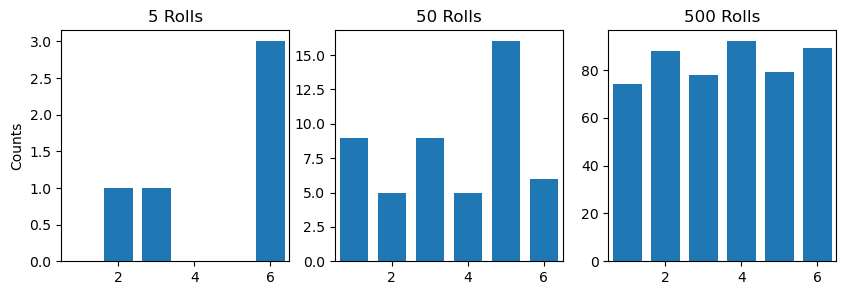

In [3]:
import matplotlib.pyplot as plt

def rollN(n,faces = d6faces): #get multiple random variables X
    return np.asarray([rollDie(faces) for _ in range(n)])
    
binedges  = np.arange(7)+0.5

#Histograms!
fig, axs = plt.subplots(1,3,figsize = (10,3))
axs[0].hist(rollN(5),bins = binedges,align='mid',rwidth = 0.75)
axs[0].set_title('5 Rolls')
axs[1].hist(rollN(50),bins = binedges,align='mid',rwidth = 0.75);
axs[1].set_title('50 Rolls')
axs[2].hist(rollN(500),bins = binedges,align='mid',rwidth = 0.75)
axs[2].set_title('500 Rolls')
axs[0].set_ylabel('Counts')
plt.setp(axs,xlim = [0.5,6.5])

If the die is fair, each face of the die would have an equal $\frac{1}{6}$ chance of landing on top. Then the probability density should be constant.  

But the histograms above do not really represent the probability distribution of $\Omega$, but rather the distribution of our sample $O$. The more rolls we make, the larger the sample size, and the more this histogram comes to resemble the actual constant distribution underlying $X$. To make our histograms look more like the nice functions we see in textbooks, we need to take the limit $N \to \infty$ where $N$ is the number of rolls.

Text(0.5, 1.0, 'PDF and CDF : 100000 rolls')

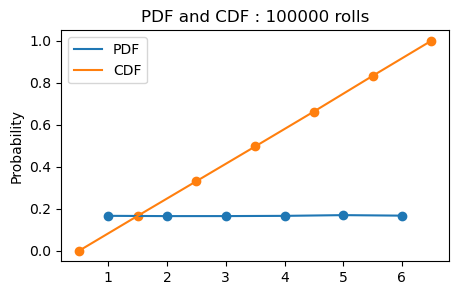

In [4]:
N = 100000 # How many rolls?

def calcDistr(arr,minval,maxval,dbin):
    bins = np.linspace(minval - dbin/2, maxval + dbin/2, int((maxval - minval)/dbin + 2)) #make bins
    hist,_ = np.histogram(arr,bins = bins) 
    pdf = hist/sum(hist) #normalize
    cdf = [sum(pdf[:i]) for i in range(len(pdf)+1)] #integrate 
    return pdf,cdf,bins
    
def midBins(bins): #find the middle of each bin
    return (bins[1:] + bins[:-1])/2

pdf,cdf,bins = calcDistr(rollN(N),1,6,1)
plt.figure(figsize = (5,3))
plt.plot(midBins(bins),pdf,label = 'PDF')
plt.scatter(midBins(bins),pdf,color = 'tab:blue')
plt.plot(bins,cdf,label = 'CDF')
plt.scatter(bins,cdf,color = 'tab:orange')
plt.legend()
plt.ylabel('Probability')
plt.title('PDF and CDF : ' + str(N) + ' rolls') 
 

Now this looks more like it! 

Technically this is still not really a probability density *function*, since the faces can only be integer values. Rather, it is a discrete probability distribution. If we truly want to calculate a PDF we need make a die who could land on any real number between 0 and 6, or $\Omega = \{x \in \mathbb{R} | \ 0 \leq x \leq 6\}$, which would require the die to have an infinite number of faces. 

### The average roll 
What is the average value of a die? Intuitively, we know that it's probably somewhere between 3 and 4,even though that's not a face on the die. To calculate this with math, we can multiply each face of the die $\omega \in \Omega$ by the probability of it landing on top, and then adding everything together. Since the probability is $1/6$ for every face, the average, or *expected value*, of a roll is,
$$
E(X) = \frac{1 + 2 + 3 + 4 + 5 + 6}{6} = \frac{21}{6} = 3.5
$$

Another way to find out the average value is by rolling the die many many times, and actually calculating the mean value across multiple rolls.

In [5]:
numrolls = 200000
allrolls = rollN(numrolls)
print('Rolls: ' + str(allrolls))
print('Mean value of roll: ' + str(np.mean(allrolls)))

Rolls: [3 1 3 ... 5 4 4]
Mean value of roll: 3.49248


Theoretically, the bigger our sample size (aka number of rolls), the closer we should get to the expected value of 3.5

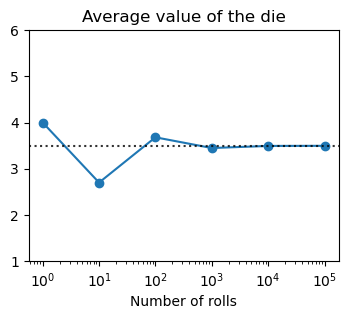

In [6]:
nrolls = [1,10,100,1000,10000,100000]
means = [np.mean(rollN(n)) for n in nrolls]

fig,ax = plt.subplots(figsize = (4,3))
ax.scatter(nrolls, means)
ax.plot(nrolls, means)
ax.axhline(3.5,color = 'k',linestyle = ':',alpha = 0.8)
plt.setp(ax,ylim = [1,6],title = 'Average value of the die',xlabel = 'Number of rolls',xscale = 'log');


In general, we can calculate the average value for a die with any number of faces. d12, d20, d413? It's all possible, Euclid be damned. So for a dn where n is the number of faces, and the probability distribution across all faces is constant (so a fair die), the expected value of a roll is
$$
E(X) = \frac{\sum_{k = 1}^n k}{n} = \frac{1}{n}\frac{n(n+1)}{2} = \frac{n+1}{2}
$$


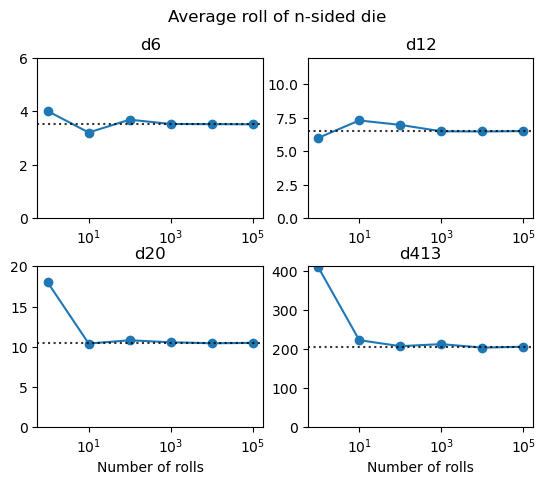

In [7]:
def plot_dnmeans(ax,n,Ns):
    faces = np.arange(n) + 1 #set up the faces for dN 
    means = [np.mean(rollN(N,faces = faces)) for N in Ns]
    ax.scatter(Ns, means)
    ax.plot(Ns, means)
    ax.set_title('d'+str(n))
    ax.axhline((n+1)/2,color = 'k',linestyle = ':',alpha = 0.8)
    ax.set_ylim([0,n])
fig,axs = plt.subplots(2,2)
plt.suptitle('Average roll of n-sided die')
plot_dnmeans(axs[0,0],6,nrolls)
plot_dnmeans(axs[0,1],12,nrolls)
plot_dnmeans(axs[1,0],20,nrolls)
plot_dnmeans(axs[1,1],413,nrolls)
plt.setp(axs[1,:],xlabel = 'Number of rolls')
plt.setp(axs,xscale = 'log')
plt.subplots_adjust(hspace = 0.3)

In [8]:
np.mean(rollN(10,faces = np.arange(413)+1))

149.8

The key takeaway here is that for any random variable $X$, the more realizations we have, the closer their distribution is to "reality", and thus the closer their sample mean comes to its actual expected value. Here we used a die for our random variable $X$ with a uniform distribution, but this is also true for any distribution of probabilities no matter how complicated. 

As scientists, we are often making measurements to help us understand some complicated truth. If we are doing things right (ie. no systemic biases), then each measurement is a random variable and each data point a realization. The more data points we have, the distribution of the dataset becomes more "accurate". Sample size matters! 

### Rolling multiple dice 
Now say,instead of rolling just a single die, we roll a hundred dice all at once and take the average value of the lot. We already know that the expected value for a d6 is 3.5, but the sample means may fluctuate around that actual expected value. So each calculation for the sample mean is itself a random variable!

Question: $ X : \Omega \to O $. What is $\Omega$ now? What is $O$?

In [8]:
numrolls = 5 #how many rolls to average over?
numexperiments = 15 #how many times do we do the experiment? 

def avgRolls(n,N):
    return [sum(rollN(n))/n for _ in range(N)]
means = avgRolls(numrolls,numexperiments)
print('Mean roll across ' + str(numrolls) + ' rolls, repeated ' + str(numexperiments) + ' times : \n' + str(means))

Mean roll across 5 rolls, repeated 15 times : 
[4.4, 2.8, 4.4, 2.4, 4.6, 4.0, 3.4, 3.8, 3.8, 2.4, 2.6, 3.6, 5.0, 4.4, 2.4]


Let plot the distribution of these means. The shape may look familiar. 

Text(0.5, 0.98, 'Probability of Averages')

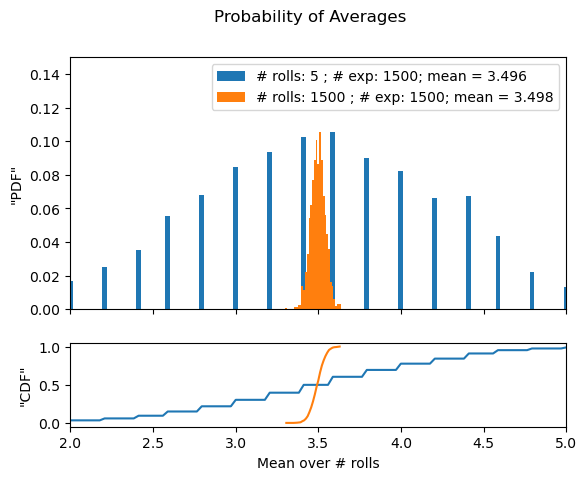

In [9]:
def histplotrolls(ax,numrolls,numexp,legend = True,cdfax = None):
    means = avgRolls(numrolls,numexp)
    hist, bins = np.histogram(means, bins=int(100/np.log10(numrolls)))
    bmid = (bins[:-1] + bins[1:]) / 2
    width = (bins[1] - bins[0])
    axhist = ax.bar(bmid,(hist/hist.sum()),width = width,label = '# rolls: ' + str(numrolls) + ' ; # exp: ' + str(numexp) + '; mean = ' + str(round(np.mean(means),3)))
    if legend:
        ax.legend()
    if cdfax:
        cdfax.plot((bins[1:] + bins[:-1])/2,np.cumsum(hist)/numexp) 
    return means

fig,axs = plt.subplots(2,1,height_ratios = [3,1],sharex = True)
means15 = histplotrolls(axs[0],5,1500,cdfax = axs[1])
means150 = histplotrolls(axs[0],1500,1500,cdfax = axs[1]) 
plt.setp(axs[0],xlim = [2,5],ylim = [0,0.15],ylabel = '"PDF"')
plt.setp(axs[1],ylabel = '"CDF"',xlabel = 'Mean over # rolls')
plt.suptitle('Probability of Averages')

In the case where we calulate the mean roll over only 5 dice, we got a much larger range than when we did the same over 1500 dice (since we learned earlier that more dice $\to$ more "accurate" the mean value). This is called the variance, or the *second moment*.

### Central Limit Theorem
As we expect, the majority of the mean values are somewhere close to the true value 3.5, but there are outliers in either direction. But the more samples means we calculate, the more our probability distribution begin to resemble a very familiar shape. This distribution pops up so often that it is called the *normal distribution*. 

The tendency for the a large enough sample of means to be normally distributed around the expected value is called the *central limit theorum*. In our case, we started with a uniform distribution (a fair die), but this property is always true! The sample means should be normally distributed around the actual expected value from that unknown underlying distribution, even if we don't know what that is. This also means that if we take a number of samples from any distribution, we can get the expected value by calculating the mean of the means.

Overall, the shape of this distribution is a gaussian, or a bell curve, which has the form
$$
g(x) = \frac{1}{\sigma \sqrt{2\pi}} \exp\frac{-(x-\mu)^2}{2\sigma^2}
$$
$\mu$ is the expected value, which sets the center of the curve, and $\sigma^2$ is the variance, which sets the width. Since we saw earlier that the more rolls we have to calculate the mean, the closer that sample mean gets to the actual expected value 3.5, we should expect the variance from a greater number of rolls to be smaller. Indeed, we do see that the orange curve is narrower than the blue. 

Caveat: Since these histograms are from discrete data, the probability "densities" aren't really the same as a PDF. The purpose of these plots is to look at the *shape* of the distributions, and worry less about what the number on the yaxis. The CDF checks out though. 

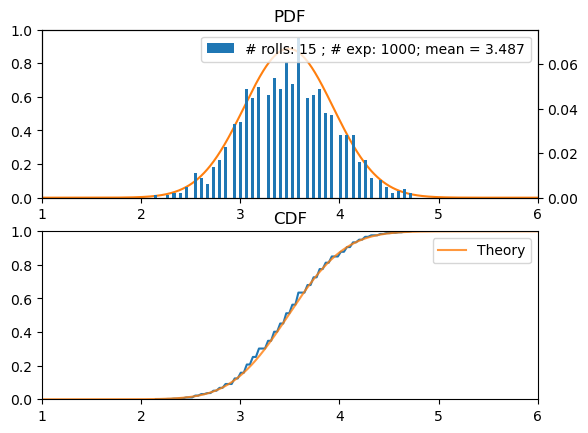

In [10]:
xbar = np.linspace(1,6,1000)
def gaussian(x,mu,sig):
    return np.exp(-(x - mu)**2/(2*sig**2))/(sig*np.sqrt(2*np.pi))    
fig,axs = plt.subplots(2,1)
ax2 = axs[0].twinx()
means15 = histplotrolls(ax2,15,1000,cdfax = axs[1])
axs[0].plot(xbar,gaussian(xbar,np.mean(means15),np.std(means15)),color = 'tab:orange')
axs[1].plot(xbar,np.cumsum(gaussian(xbar,np.mean(means15),np.std(means15)))* (xbar[1] - xbar[0]),alpha = 0.8,label = 'Theory');axs[1].legend()
axs[0].set_title('PDF');axs[1].set_title('CDF');
plt.setp(axs,xlim = [1,6],ylim = [0,1]);


#### A note on notation. 
In proper statistics, there is a distinction between the true *population* mean and the *sample* mean. When we use the above formula to calculate $E(X_{d413}) = 207$ for the 413 sided die, that refers to the population mean $\mu$. Because 207 comes from an intrinsic property of the die, $\mu = 207$ *always*. However, if we rolled the d413 ten times and get a sample mean of $\bar{x}$ = 154.8, that might be different the next time we roll. Here are some common ways to denote the means and variance (1st and 2nd moments).

* Mean: 
     * Population: $E(X)$ or $\mu$
     * Sample: $\bar{x}$ or $\langle x \rangle$ 
* Variance: 
    * Population: $\sigma^2$ or $E((X - E(X))^2)$
    * sample: $s^2$

In oceanography we almost never know the actual *population* statistics, since that requires perfect knowledge of what we aim to measure before we even get there! Instead, we can only clumsily stick our probes into where we can, and as a result we are only working with *sample* statistics most of the time. The terminology may then become somewhat relaxed. 

## Confidence Intervals
Say now we have a weighted die, and we want to know the expected value of the die roll. Since it is no longer guaranteed that each side has an equal chance appearing on top, we can no longer assume that the expected value is 3.5 as it was before. 

Let's determine what it should be through the powers of experimentation. Using all the same steps as above, we can plot the distribution of the sample means by rolling the weighted die many times. And like before, we get something that looks normally distributed.

What is the expected value of the mystery die? If I guess that the expected value is 4.29 based on these plots, how confident should I be in that guess? 

[Text(0, 0.5, 'Counts'), Text(0.5, 0, 'Sample Mean'), 1.0, 6.0]

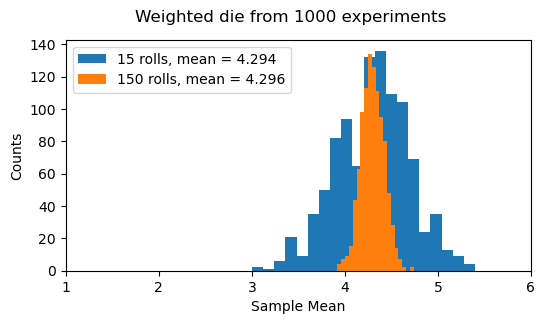

In [11]:
wts = [7,15,25,43,7,57] #Choose any 6 numbers
def weighted_roll(faces = d6faces, wts = wts):
    return np.random.choice(faces,p = np.asarray(wts)/sum(wts))
def wtrollN(n,wts = wts):
    return np.asarray([weighted_roll(wts = wts) for _ in range(n)])
def avgwtRolls(n,N):
    return [sum(wtrollN(n,wts = wts))/n for _ in range(N)]

fig,ax = plt.subplots(figsize = (6,3))
plt.suptitle('Weighted die from 1000 experiments');
wtmeans15 = avgwtRolls(15,1000)
ax.hist(wtmeans15,bins = 20,label = '15 rolls, mean = '+ str(round(np.mean(wtmeans15),3)));
wtmeans150 = avgwtRolls(150,1000)
ax.hist(wtmeans150,bins = 20,label = '150 rolls, mean = '+ str(round(np.mean(wtmeans150),3)));
ax.legend(loc = 'upper left');
plt.setp(ax,ylabel = 'Counts',xlabel = 'Sample Mean',xlim = [1,6])

### Standard deviation

Let's say that the expected value is 4.29. But clearly, every time I re-run the code, the mean value from the plot is slightly different. So how can I know whether that was a good guess?. After running the block a bunch of times, however, I can observe that calculated means usualy land somewhere between 4 and 4.5, so I can be pretty confident the expected value is between those end points. How would we quantify this? 

Previously in this review, we learned abut the variance. A standard deviation, like the variance, measure the variability of the data. It is equal to the square root of the variance. 
$$
\sigma = \sqrt{\mathrm{var}(X)} = \sqrt{\frac{\Sigma_{i=0}^N (x_i - \mu)^2}{N}}
$$

Often, the standard deviation is preferred over the variance because the variance is a squared quantity, so the standard deviation is more directly comparable to the values we are actively using. If our random variable had units, say [m/s] for wind speed, then the standard deviation would also have the same units.

By the central limit theorem, we know that this distribution is roughly normal. So let's fit a gaussian to this data. 

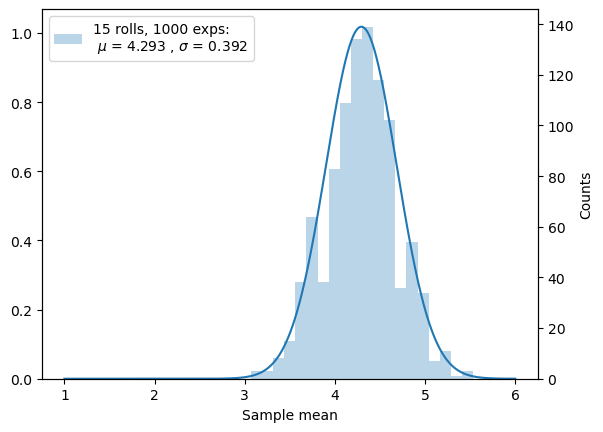

In [12]:
def plot_histgauss(ax,axtwin,xbar,arr,nbins = 20,**kw):
    pdf = gaussian(xbar,np.mean(arr),np.std(arr))
    hist = axtwin.hist(arr,bins = nbins,**kw)
    color = hist[2][0].get_facecolor()
    ax.plot(xbar,pdf,color = color,alpha = 1)
    ax.set_ylim(ymin = 0)
    
wtmeans15 = avgwtRolls(15,1000)
pdf = gaussian(xbar,np.mean(wtmeans15),np.std(wtmeans15))
fig,ax = plt.subplots()
ax2 = ax.twinx()
plot_histgauss(ax,ax2,xbar,wtmeans15,label = '15 rolls, 1000 exps: \n ' + r'$\mu$ = '+ str(round(np.mean(wtmeans15),3)) + ' , ' + r'$\sigma$ = ' + str(round(np.std(wtmeans15),3)),alpha = 0.3)
ax2.legend();ax2.set_ylabel('Counts')
ax.set_xlabel('Sample mean');

If we roll 15 weighted dice again for another sample mean, we can calculate how likely that next mean will land within some interval by integrating the gaussian inside that interval. 

In [218]:
def in_interval(x,int,inclusive = True):
    if inclusive:
        return (x>= int[0]) & (x<= int[1])
    else:
        return (x> int[0]) & (x< int[1])
        
def integrate_interval(x,f,int):
    interval = in_interval(x,int)
    dx = x[1] - x[0] #needs to be constant 
    return np.sum(f[interval] * dx)
    
print('Probability that the next sample mean is between 3-4: ' + str(round(integrate_interval(xbar,pdf,[3,4]),4)))
print('                     ...                         4-5: ' + str(round(integrate_interval(xbar,pdf,[4,5]),4)))
print('The next sample mean: ' + str(np.mean(wtrollN(15))))

Probability that the next sample mean is between 3-4: 0.2272
                     ...                         4-5: 0.7371
The next sample mean: 3.933333333333333


Since we are using a gaussian distribution, there are a few special properties on which we can lean. First, if we center our interval at the mean, we can use just one number to describe the interval since the distribution is symmetrical. Second, we can use the standard deviation to specify these intervals with consistent probabilities. The probability that the value sits between $\mu \pm \sigma$ is about 68%, while the probabiliy that it's between $\mu \pm 2\sigma$ is about 95%. 

In [14]:
mu = round(np.mean(wtmeans15),3)
sig = round(np.std(wtmeans15),3)
print('Within '+ str(mu) + '+-' + str(sig)+ ' = ' + str(integrate_interval(xbar,pdf,[mu - sig,mu + sig])*100) + '%')
print('Within '+ str(mu) + '+-' + str(2*sig)+ ' = ' + str(integrate_interval(xbar,pdf,[mu - 2*sig,mu + 2*sig])*100) + '%')

Within 4.293+-0.392 = 68.41132346138366%
Within 4.293+-0.784 = 95.44461972728662%


### Standard error

Let's take a step back. The question I asked earlier wasn't "How likely is the next sample mean going to be equal to $\mu$?". It was "how likely is $\mu$ the *actual expected value* of the mystery weighted die?

The distribution above already look like a bell curve. But the central limit theorem only promises us a normal distribution centered at the expected value if we take an *infinite* number of sample means. We're not going to sit around and calculate dice rolls until the heat death of the universe, but we do know that the more experiments we do, the distribution looks more normal and the mean of that distribution is probably also closer to the expected value.

Text(0.5, 0.98, 'Means of 15 dice rolls')

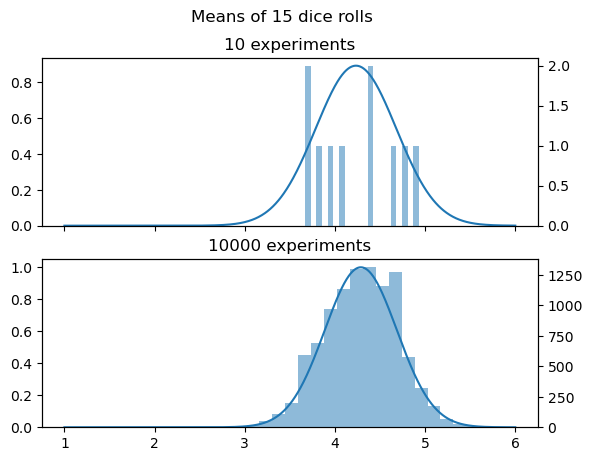

In [225]:
wtmeans15_10 = avgwtRolls(15,10)
wtmeans15_10000 = avgwtRolls(15,10000)
fig, axs = plt.subplots(2,1,sharex = True)
plot_histgauss(axs[0],axs[0].twinx(),xbar,wtmeans15_10,alpha = 0.5)
plot_histgauss(axs[1],axs[1].twinx(),xbar,wtmeans15_10000,alpha = 0.5)
axs[0].set_title('10 experiments');axs[1].set_title('10000 experiments')
plt.suptitle('Means of 15 dice rolls')



But the standard deviations of the two look almost the same! This makes sense since both are using 15 dice. They are both samples from the same normal distribution, it's just that the second has more samples, so it represents the underlying normal distribution better, and the mean is probably more accurate. So how do we quantify that? 

Behold the standard error.
$$
SE = \frac{\sigma}{\sqrt{n}}
$$
Where $n$ is the number of samples we have.  The standard error, or sometimes called "standard error of the mean" is the key ingredient for how we actually define confidence intervals. 

The confidence interval can than be calculated from the standard error and the mean 

$$ C.I = \mu \pm Z * \frac{\sigma}{\sqrt{n}}$$

where $Z$ is a value that selects for how wide we want our confidence intervals to be. For $Z =1$, this translate to a confidence interval of about 68\%, while $Z = 2$ gives us something closer to 95\%. These numbers come from distributions such as the Student's t distribution, but are usually just kept in lookup tables [this one](https://www.sjsu.edu/faculty/gerstman/StatPrimer/t-table.pdf).

In [235]:
print('68% confidence intervals: ')
print('\t 10 experiments: ' + str(round(np.mean(wtmeans15_10),4)) + '+-' + str(round(np.std(wtmeans15_10) / np.sqrt(len(wtmeans15_10)),4)))
print('\t 10000 experiments: ' + str(round(np.mean(wtmeans15_10000),4)) + '+-' + str(round(np.std(wtmeans15_10000) / np.sqrt(len(wtmeans15_10000)),4)))

68% confidence intervals: 
	 10 experiments: 4.2333+-0.1415
	 10000 experiments: 4.287+-0.004


And what is the actual expected value? Let's calculate that from the weights we set earlier. The probability set by each weight is
$$ p(x_i) = \frac{wt_i}{\sum_{i=1}^6 wt_i} $$
and 
$$E(X_{\mathrm{weighted\ die}}) = \sum_{i =1 }^6 p(x_i) * x_i$$

In [236]:
pwts = np.asarray(wts) / sum(wts)
expval = (sum([d6faces[i] * wts[i] for i in range(6)]))/sum(wts)
expval

4.292207792207792

So the guess of 4.29 is really not bad. Nice! 

## Correlation, covariance, and coherence 

Sometimes, we have more than one sample, and we would like to compare them to each other. Three terms often come up in this context: correlation, covariance, and coherence. Let's go through each of these with the SIO pier as our example. 

In [20]:
#sort out data 
import pandas as pd 
from datetime import datetime

sst = pd.read_csv('LaJolla_TEMP_1916-202503.csv',header = 46) #SIO Pier Temp 
sst = sst.set_index(pd.to_datetime([datetime(sst['YEAR'].values[i],sst['MONTH'].values[i],sst['DAY'].values[i]) for i in range(len(sst))]))
ljtg = pd.read_csv('https://uhslc.soest.hawaii.edu/data/csv/fast/daily/d554.csv',header = None,names = ['year','month','day','sl_mm']) # SIO Pier Tide Gauge 
ljtg = ljtg.set_index(pd.to_datetime([datetime(ljtg.year[i],ljtg.month[i],ljtg.day[i]) for i in range(len(ljtg))]))
#match timestamps to make them the same length 
siotemp = sst.SURF_TEMP_C[sst.index > ljtg.index[0]].values
siosl = ljtg.sl_mm[ljtg.index < sst.index[-1]].values/1000 #Remove fill values, convert from mm to m
siosl[siosl< -10] = np.nan
times = sst.index[(sst.index > ljtg.index[0])]

Text(0.5, 0.98, 'SIO Pier Temperature and Sea Level - Are they related? How?')

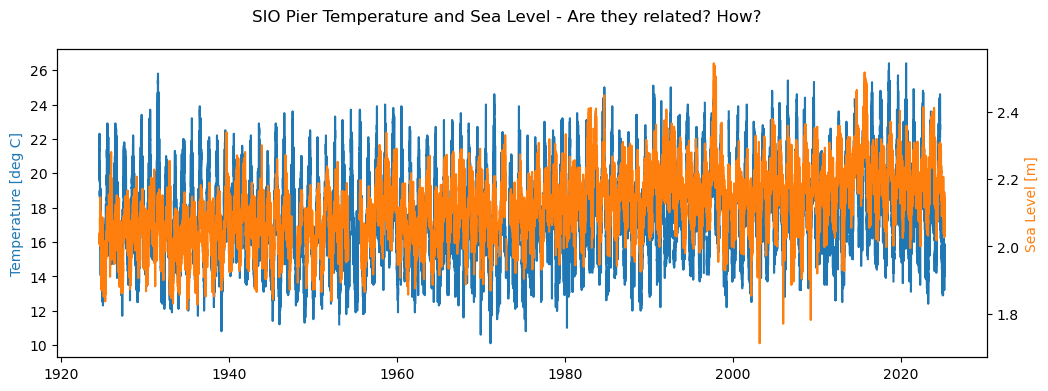

In [21]:
fig,ax = plt.subplots(figsize=(12,4)) #plot the timeseries 
ax.plot(times,siotemp);ax.set_ylabel('Temperature [deg C]',color = 'tab:blue')
ax2 = ax.twinx()
ax2.plot(times,siosl,color = 'tab:orange');ax2.set_ylabel('Sea Level [m]',color = 'tab:orange')
plt.suptitle('SIO Pier Temperature and Sea Level - Are they related? How?')

### Covariance vs. Correlation 

The two timeseries look like they "go together" pretty well. The simplest way to verify this is just to  most basic way to plot the two variables against each other as a scatter plot. Here, we see that there is a positive relationship between the two, which can be measured by the covariance. 

Text(0, 0.5, ' SL [m]')

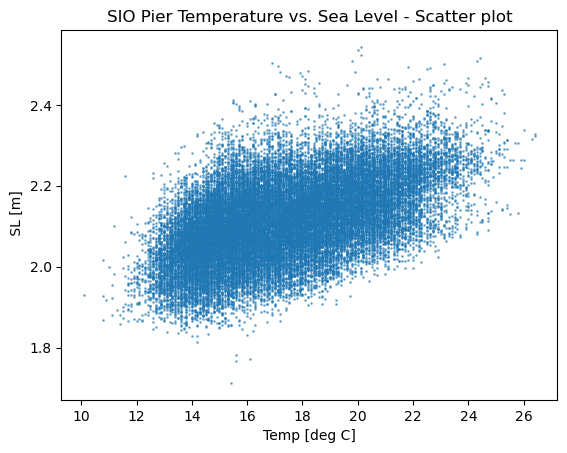

In [22]:
plt.title('SIO Pier Temperature vs. Sea Level - Scatter plot')
plt.scatter(siotemp,siosl,s = 1,alpha = 0.5)
plt.xlabel('Temp [deg C]');plt.ylabel(' SL [m]')

The covariance describes the *joint variability* between the two timeseries. We had the variance, and now we have two of them. The equation is

$$ Cov(X,Y) = E((X - E(X))(Y-E(Y))) = \frac{\Sigma_{i=0}^N (X_i - \bar{X})(Y_i - \bar{Y})}{N} $$

Also, notice that this is very similar to the variance equation.

$$ Var(X) = Cov(X,X)= \frac{\Sigma_{i=0}^N (X_i - \bar{X})^2}{N} $$

Note that the $N$ in the denominator is for a *population* covariance, while the equation for *sample* covariances has $N-1$ instead. But if our sample size $N$ is big, this makes a very small difference. In python, we can just calculate the covariance like this.

In [23]:
def get_nans(arrs):
    nans = np.zeros(len(arrs[0])).astype(bool)
    for arr in arrs:
        nans = nans | np.isnan(arr)
    return nans 
naninds = get_nans([siotemp,siosl]) #[5144:8368]

np.cov(siotemp[~naninds],siosl[~naninds]) #X1 - temperatures, X2- sea leveles

array([[7.21158839, 0.14118371],
       [0.14118371, 0.00962333]])

This returns the covariance matrix where each element $C_{ij} = Cov(X_i,X_j)$. So $C_{00}$ and $C_{11}$ are, respectively, the variance of temperature and sea level. The covariance between the two are stored in the off diagonal elements $C_{10}$ and $ C_{01}$ (which are the same). 

So 
$$ Cov(temp,sl) \approx 0.141 $$

<p align="center">
    <img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTcco21eXwuJry0TO87to5n61rW2Jc8TH3PIQ&s">
<p>

The covariance is positive, so we know that temperature is positively related to sea level. But how strong is this relationship? It is hard to intepret whether 0.141 is "close to zero", as the infographic says. Furthermore, if I had input sea level in mm rather than m (like the raw data), then the covariance would be 1000x larger even if the information is identical. 

In [24]:
np.cov(siotemp[~naninds],siosl[~naninds]*1000)

array([[7.21158839e+00, 1.41183709e+02],
       [1.41183709e+02, 9.62332714e+03]])

Enter the correlation coefficient. This is the same thing as covariance, but now it is normalized by the variance of the input. 

$$ Corr(X,Y) = r_{xy} = \frac{\Sigma_{i=0}^N (X_i - \bar{X})^2}{\sqrt{\Sigma(X_i - \bar{X})^2\Sigma(Y_i - \bar{Y})^2}} = \frac{Cov(X,Y)}{\sqrt{Var(X)Var(Y)}}$$

This will return a value between -1 and 1, which is independent of the variance of our inputs and can thus be compared to other correlation coefficients you encounter in the wild. 

There is a built in function for this as well. Try multiplying either inputs by some constant. Does the correlation matrix change?

In [25]:
tempslcorr = np.corrcoef(siotemp[~naninds],siosl[~naninds])
print(tempslcorr)

[[1.         0.53592806]
 [0.53592806 1.        ]]


Note that the diagonals are now both 1, since anything is perfect correrlated with itself. But we can say that the *correlation coefficient* is
$$ r_{xy} \approx 0.536 $$
So the correlation is not super strong, but it certainly well above 0. If we plot a line on top of the scatter plot from earlier, this intepretation does make sense. 


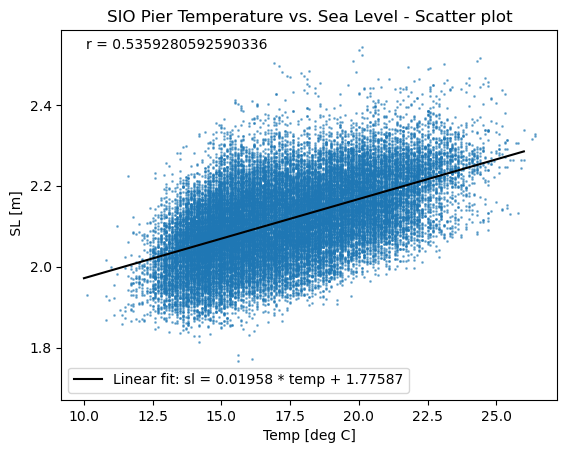

In [26]:
linfit = np.polyfit(siotemp[~naninds],siosl[~naninds],1)
plt.title('SIO Pier Temperature vs. Sea Level - Scatter plot')
plt.scatter(siotemp,siosl,s = 1,alpha = 0.5)
temps = np.linspace(10,26,1000)
plt.plot(temps,temps*linfit[0] + linfit[1],color = 'k',label = 'Linear fit: sl = '+str(round(linfit[0],5)) + ' * temp + ' + str(round(linfit[1],5)))
plt.text(0.05,0.95,'r = ' + str(tempslcorr[0,1]),transform = plt.gca().transAxes,)
plt.xlabel('Temp [deg C]');plt.ylabel(' SL [m]');plt.legend()

### Cross Correlation

What if there is a time delay between temperature and sea level. For example, if I snap my fingers and make the entire ocean 2 degrees cooler, it might take some time between the moment I snapped my fingers to when the sea level actually begins to decline.

#### Toy Example
These two signals are identical, but one was time shifted. If I plot them against each other, the scatter plot doesn't actually look linear!

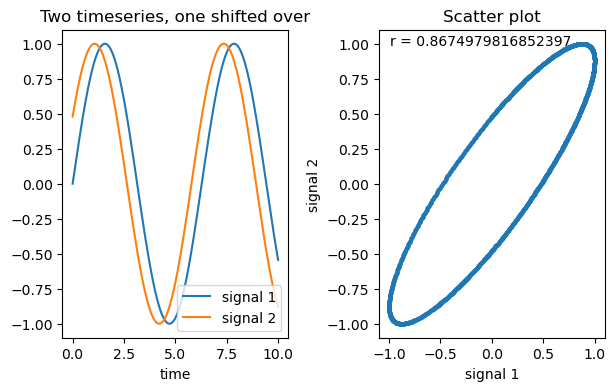

In [27]:
t = np.linspace(0,10,1000)
sig1 = np.sin(t)
sig2 = np.sin(t+0.5)
fig,axs = plt.subplots(1,2,figsize = (7,4))
axs[0].plot(t,sig1,label = 'signal 1');axs[0].plot(t,sig2,label = 'signal 2');axs[0].legend(loc = 'lower right')
plt.setp(axs[0],xlabel = 'time',title = 'Two timeseries, one shifted over')
axs[1].scatter(sig1,sig2,s = 5);axs[1].text(0.05,0.95,'r = '+str(np.corrcoef(sig1,sig2)[0,1]),transform = axs[1].transAxes)
plt.setp(axs[1],xlabel = 'signal 1',ylabel = 'signal 2',title = 'Scatter plot');

plt.subplots_adjust(wspace = 0.4)

This is where the *cross correlation* comes in. It's like the correlation oefficient, but now as a function of the time lag between the two inputs. 

Let $X,Y$ be distinct variables, and let $f,g$ be their associated probability density functions. Then the cross correlation for a given lag (or displacement) $\tau$ is 
$$ XCorr(X,Y)(\tau) = (f \star g)(\tau) = \int_{-\infty}^\infty \overline{f(t)}g(t + \tau) dt = \int_{-\infty}^\infty \overline{f(t-\tau)}g(t) dt $$
where $\overline{f(t)}$ is the complex conjugate of f(t). 

Max correlation: 0.9700596687639693


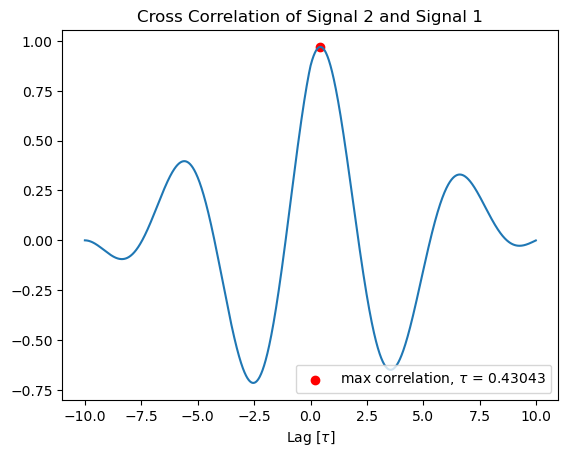

In [28]:
cross12 = np.correlate(sig1/np.linalg.norm(sig1),sig2/np.linalg.norm(sig2),mode = 'full') #gotta normalize the inputs. The details of how are beyond the scope of this lecture
dt = np.mean(np.diff(t))
lags = (np.arange(len(cross12))-1000) * dt #get my array of possible lags 

plt.plot(lags,cross12)
plt.xlabel('Lag [$\\tau$]');plt.title('Cross Correlation of Signal 2 and Signal 1')
peak = np.argmax(cross12)
plt.scatter(lags[peak],cross12[peak],color = 'r',label = 'max correlation, $\\tau$ = ' + str(round(lags[peak],5)))
plt.legend(loc = 'lower right')
print('Max correlation: ' + str(cross12[peak]))

So now we have learned that the maximum correlation occurs when the first signal lags behind the second signal by 0.43. However, even though we put in the same sine wave twice, some of this information got lost under the hood, so the nominal value of the correlation at this lag is only 0.97. 

#### Side note: Convolutions
You might recognize the form of the integral used in the formula for cross correlation. It's a convolution, yet another related term that also starts with a c just to confuse us all. A convolution is a type of operation that can be performed any two functions. The cross correlation can be calculated via a convolution 

$$ (f(t) \star g(t)) (\tau) = (f(t) * g(-t))(\tau) = \int_{-\infty}^\infty \overline{f(t)}g(t - \tau) dt $$

Here's an infographic. 

<p align="center">
    <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/2/21/Comparison_convolution_correlation.svg/800px-Comparison_convolution_correlation.svg.png">
<p>

A full explaination of what this means is well beyond the scope of this lecture. But I do recommend this [youtube video](https://www.youtube.com/watch?v=KuXjwB4LzSA). 

#### Back to the Ocean

How does this help us oceanographically? Well let's apply this math to the two timeseries from above. Since we are integrating, we can't have any NaNs in our arrays, so we need to zoom in to a part of the timeseries where there are no NaNs. 


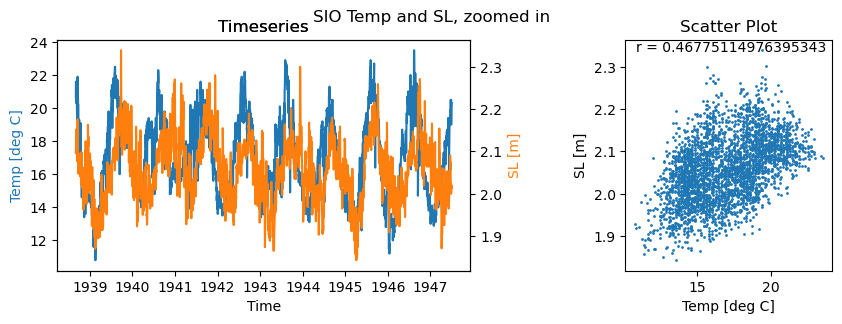

In [29]:
np.argwhere(naninds)[150:200]
zoomin = slice(5144,8368) #trial and error :/ 
fig,axs = plt.subplots(1,2,figsize = (10,3),width_ratios = [2,1])
plt.suptitle('SIO Temp and SL, zoomed in')
axs[0].plot(times[zoomin],siotemp[zoomin]);ax2 = axs[0].twinx();axs[0].set_ylabel('Temp [deg C]',color = 'tab:blue')
ax2.plot(times[zoomin],siosl[zoomin],color = 'tab:orange');ax2.set_ylabel('SL [m]',color = 'tab:orange')
plt.setp([axs[0],ax2],xlabel = 'Time',title = 'Timeseries')
axs[1].scatter(siotemp[zoomin],siosl[zoomin],s = 1)
axs[1].text(0.05,0.95,'r = ' + str(np.corrcoef(siotemp[zoomin],siosl[zoomin])[0,1]),transform = axs[1].transAxes,)
plt.setp(axs[1],xlabel = 'Temp [deg C]',ylabel = 'SL [m]',title = 'Scatter Plot')
plt.subplots_adjust(wspace=0.5)

Since we only care about the variability, and not the mean value, we need to subtract the mean temp and sea level from each timeseries. Then we normalize by the length of the vector. 

In [30]:
def normalizearr(arr):
    return (arr - np.nanmean(arr))/np.linalg.norm(arr - np.nanmean(arr))

Max correlation: 0.6380925226148204


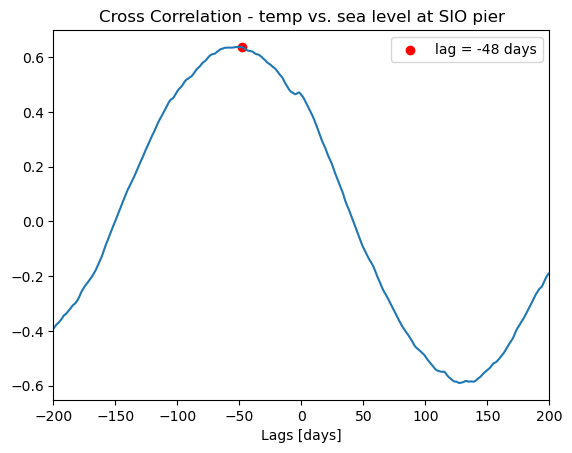

In [31]:
tempnormed = normalizearr(siotemp[zoomin])
slnormed = normalizearr(siosl[zoomin])
crosstempsl = np.correlate(tempnormed,slnormed,mode = 'full') #gotta normalize the inputs. The details of how are beyond the scope of this lecture
lags = (np.arange(len(crosstempsl))-len(times[zoomin])) #get my array of possible lags

plt.title('Cross Correlation - temp vs. sea level at SIO pier')
plt.plot(lags,crosstempsl)
plt.xlim([-200,200]);plt.xlabel('Lags [days]')
peak = np.argmax(crosstempsl)
plt.scatter(lags[peak],crosstempsl[peak],color = 'r',label = 'lag = ' + str(lags[peak]) + ' days');plt.legend();
print('Max correlation: ' + str(crosstempsl[peak]))


So in the 1940s, the temperature timeseries lagged behind sea level timeseries by -48 days. In other words, tempeature *led* sea level by 48 days. Why would the sea level lag behind temperature for so long?

##### Autocorrelation
We could have also plugged in temperature for both $X$ and $Y$ in our autocorrelation. What would that mean? 


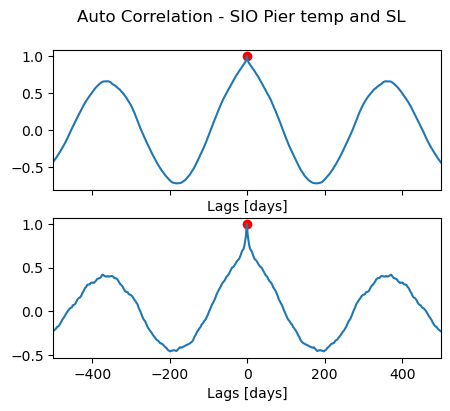

In [46]:
fig,axs = plt.subplots(2,1,figsize = (5,4), sharex = True)
plt.suptitle('Auto Correlation - SIO Pier temp and SL')
autoxtemps = np.correlate(tempnormed,tempnormed,mode = 'full')
axs[0].plot(lags,autoxtemps)
axs[0].scatter(lags[np.argmax(autoxtemps)],autoxtemps[np.argmax(autoxtemps)],color = 'r',label = 'lag = ' + str(lags[np.argmax(autoxtemps)]) + ' days')
autoxsls = np.correlate(slnormed,slnormed,mode = 'full')
axs[1].plot(lags,autoxsls)
axs[1].scatter(lags[np.argmax(autoxsls)],autoxsls[np.argmax(autoxsls)],color = 'r',label = 'lag = ' + str(lags[np.argmax(autoxsls)]) + ' days')
plt.setp(axs,xlim = [-500,500],xlabel = 'Lags [days]');

### Coherence

We can see from above that the annual cycle dominates both the temperature and sea level signals. But what about other timescales? Do the two also correlate at daily timescales? Monthly?

This is where coherence comes in. Instead of giving the correlation as a function of time, it is now a function of *frequency*. So most of the calculations are actually done in frequency, or fourier, space. To get the statistics of this process, we use [Welch's method](https://en.wikipedia.org/wiki/Welch%27s_method) to segement the data into separate chunks, take the fourier transform of each, and then average their results together to get enough chunks for statistical significance. 

The details of this calculation is not my focus here, since some of you will see this in class again while others might not ever need the gritty details. But I want to show what this method can do, how it differs from the other terms discussed above, and how to intepret the results in an oceanographic context. 

Starting with our sea level and temperature example again...

Text(0.5, 1.0, 'Coherence - Temp vs. Sea Level')

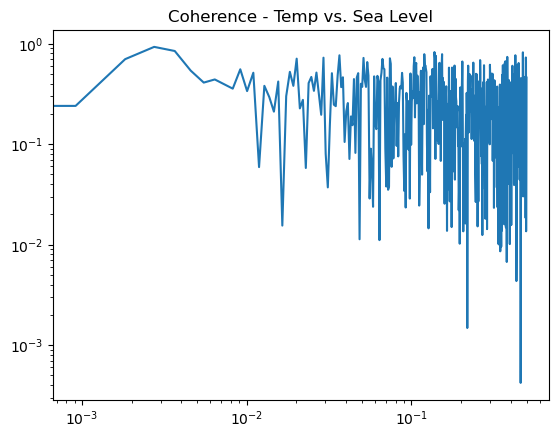

In [44]:
import scipy as sc 
f,cxy = sc.signal.coherence(tempnormed,slnormed,fs = 1,nperseg=3*365)
plt.loglog(f,cxy)
plt.title('Coherence - Temp vs. Sea Level')

Ok not much is happening... There's the annual cycle, shown by the leftmost peak (more like a bump), and then not much else. However, we are limited by our sampling frequency. 

The highest frequency we can analyze is the Nyquist frequency = 0.5 * sampling rate. In this case, our sampling rate is daily, so we can only examine processes slower than once every two days. On the other hand, we are limited by the frequency resolution = 1/length of the timeseries. We have about 8 years of data, so the resolution should be 1/8 years. However, because the data had to be segmented, we are actually bound by the length of each segment, which I had set to be 3 years. So we are also limited to processes faster than once every three years. Still a wide range, just not very interesting for temperature vs. sea level. 

Let's look at some data with a higher sampling rate: La Jolla vs. San Francisco tide gauges. 

In [46]:
ljtg2 = pd.read_csv('https://uhslc.soest.hawaii.edu/data/csv/fast/hourly/h554.csv',header = None,names = ['year','month','day','hour','sl_mm']) # SIO Pier Tide Gauge 
ljtg2 = ljtg2.set_index(pd.to_datetime([datetime(ljtg2.year[i],ljtg2.month[i],ljtg2.day[i],ljtg2.hour[i]) for i in range(len(ljtg2))]))
sftg = pd.read_csv('https://uhslc.soest.hawaii.edu/data/csv/fast/hourly/h551.csv',header = None,names = ['year','month','day','hour','sl_mm']) # San Francisco
sftg = sftg.set_index(pd.to_datetime([datetime(sftg.year[i],sftg.month[i],sftg.day[i],sftg.hour[i]) for i in range(len(sftg))]))


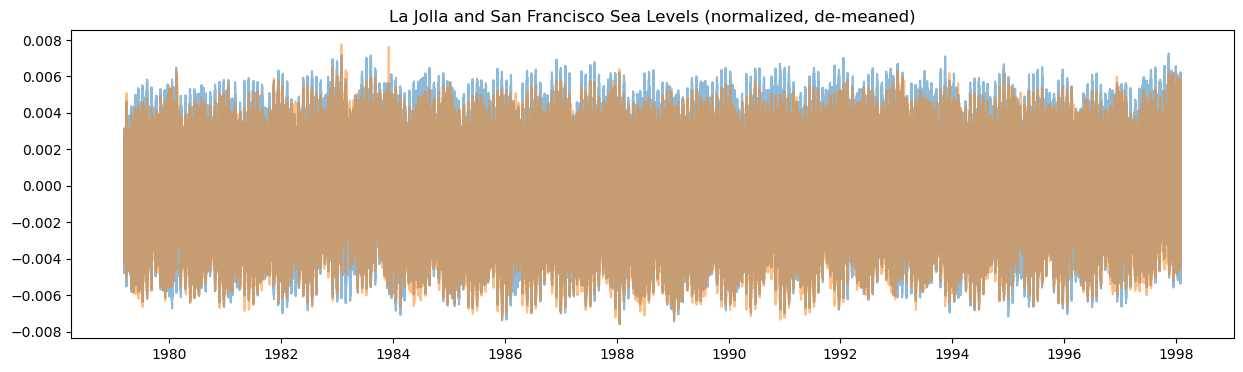

In [147]:
ljssh = ljtg2.sl_mm.values/1000
ljssh[ljssh < -10] = np.nan
sfssh = sftg.sl_mm[sftg.index >= ljtg2.index[0]].values/1000
sfssh[sfssh < -10] = np.nan
zoomin = slice(478676,644320) # pick out the biggest chunk without NaNs 
ljsshnormed = normalizearr(ljssh[zoomin])
sfsshnormed = normalizearr(sfssh[zoomin])

plt.figure(figsize = (15,4))
plt.title('La Jolla and San Francisco Sea Levels (normalized, de-meaned)')
plt.plot(ljtg2.index[zoomin],ljsshnormed,alpha = 0.5)
plt.plot(ljtg2.index[zoomin],sfsshnormed,alpha = 0.5)

And let's do this one more nicely, maybe even put in some error bars. Again, I will not go into details on how this calculation works, since you will see it again in your data analysis class. Instead, let's focus on what the results look like, and how to interpret.

[0.001, 10, 0.001, 10]

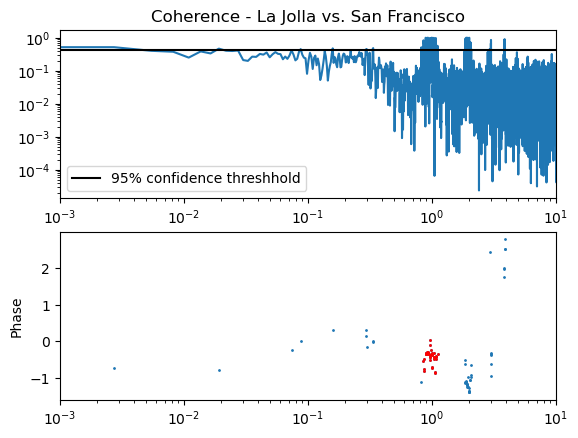

In [263]:
#stuff to make the math work, treat as black box (for now)
num_p = 1*365*24 #number of data points per segment 
gthresh = np.sqrt(1 - 0.05**(1/(18/19*(len(ljsshnormed)//num_p) -1))) #error bar          
freqs, cxy = sc.signal.coherence(ljsshnormed,sfsshnormed,fs = 24,nperseg = num_p)
_,pxy = sc.signal.csd(ljsshnormed,sfsshnormed,fs = 24,nperseg = num_p)

fig,axs = plt.subplots(2,1)
axs[0].loglog(freqs,cxy)
axs[0].set_title('Coherence - La Jolla vs. San Francisco')
axs[0].axhline(gthresh,color = 'k',label = '95% confidence threshhold')
axs[0].legend(loc = 'lower left')
axs[1].semilogx()
ph = np.angle(pxy)
ph[cxy < gthresh] = np.nan
axs[1].scatter(freqs,ph,s = 1);axs[1].set_ylabel('Phase')
# axs[1].scatter(freqs[310:450],ph[310:450],s = 1,color = 'r')
plt.setp(axs,xlim = [0.001,10])

In [267]:
print('Phases around f = 1/day: ' + str(np.nanmean(ph[310:450]/(2 * np.pi) * 1/freqs[310:450]) * 24))
print('Phases around f = 2/day: ' + str(np.nanmean(ph[650:800]/(2 * np.pi) * 1/freqs[650:800]) * 24))

Phases around f = 1/day: -1.6428599589154422
Phases around f = 2/day: -2.1763653265662355


We can see that there is quite a lot of a noise in the data even with all the segmenting and averaging that we did to get here. 

Despite the noise, there is clearly a wide peak around frequency = 1/day, as well as a few other one around 2/day. This makes sense since both San Francisco and San Diego experience a the diurnal and semi-diurnal tides. The fact that the phase shift is negative here suggests that the tides at La Jolla leads (is earlier than) than the same tides at San Francisco. By how much? If we only take the phases close to 1/day, then the mean phase shift is about -0.4, which translates to around 1.5 hours. 

The semi-diurnal tides, on the otherhand, in La Jolla are over two hours ahead than that of San Francisco. How curious...

 *** END OF IN CLASS MATERIAL (2025) ***

##  Testing samples against each other - SIO Pier SST

Ok let's back away slowly from the esoteric frequency space analysis for now. In our earlier dice example, the distinction between standard error and standard deviation is kindda subtle because the random variables that we were dealing with are themselves a mean, and it's not immediately obvious which mean we even, well, mean...

Let's look at something else. Here is the SST (sea surface temperature) from the Scripps pier again. 

Text(0.5, 1.0, 'SIO Pier Sea Surface Temperature [SST]')

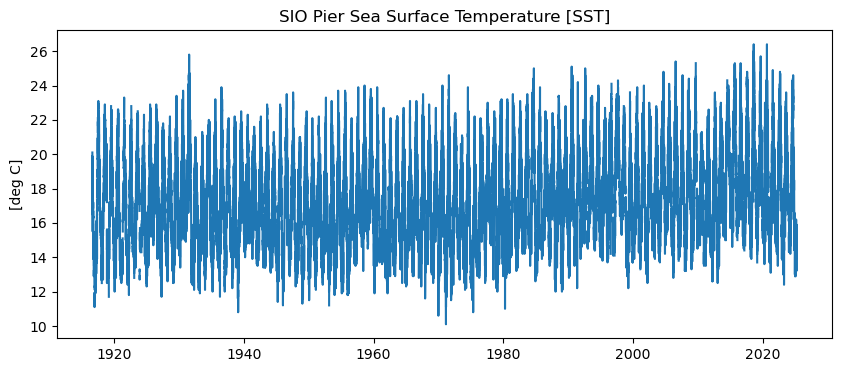

In [152]:
from datetime import datetime
import pandas as pd
import scipy as sc

plt.figure(figsize = (10,4))
plt.plot(sst['SURF_TEMP_C']);plt.ylabel('[deg C]');plt.title('SIO Pier Sea Surface Temperature [SST]')


What is the expected value of SST in January across all time? 

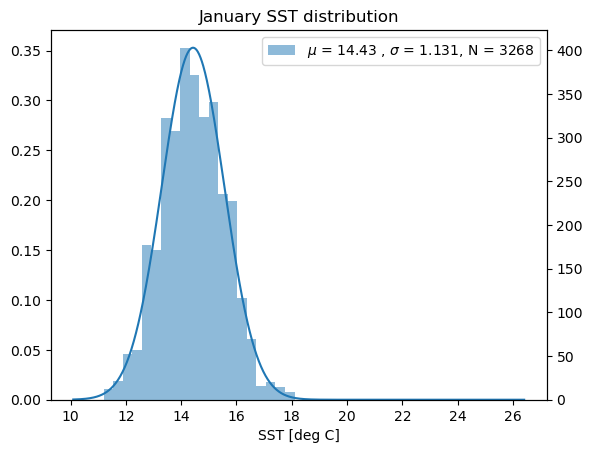

In [161]:
def rm_nans(arr):
    return arr[~np.isnan(arr)]
ssts = np.linspace(np.nanmin(sst['SURF_TEMP_C']),np.nanmax(sst['SURF_TEMP_C']),1000)

# What is the average January temperature?
jans = np.argwhere(sst['MONTH'] == 1).squeeze()
jansst = rm_nans(sst.iloc[jans]['SURF_TEMP_C'].values)
fig,ax = plt.subplots()
ax1 = ax.twinx()
plot_histgauss(ax,ax1,ssts,jansst,label = r'$\mu$ = '+ str(round(np.mean(jansst),3)) + ' , ' + r'$\sigma$ = ' + str(round(np.std(jansst),3)) +  ', N = ' + str(len(jansst)),alpha = 0.5)
ax1.legend()
ax.set_title('January SST distribution');ax.set_xlabel('SST [deg C]');

So the sample mean January SST between 1916 - 2025 is about 14.43 deg C. The standard error tells us how close this mean is to the "correct" value.

In [231]:
print('We can be 95% confident that the expected SST of January is ' + str(str(round(np.mean(jansst),3))) + '+-' + str(round(2*np.std(jansst)/np.sqrt(len(jansst)),3)) + ' deg C, brrr!')

We can be 95% confident that the expected SST of January is 14.43+-0.04 deg C, brrr!


###  Did the expected value of January temperature use to be different? - One Sample Student's t-test
The plot suggests that the SST has changed over time. If we look at the distributions of January SSTs in 1917, the first winter of data. Do they have the same mean as the overall mean? 

This is the kind of the question that can be answered with the one sample Student's t-test, which is a statistic that measures how well a particular sample's mean and spread compares to a hypothetical mean. The t-value can be calculated 
$$ t = \frac{\bar{x} - \mu_0}{SE}$$
where $\bar{x}$ is the sample mean and $\mu_0$ is the postulate mean. Fun history fact, it's called Student's t-test not because it's for students to learn, but rather that it is named after William Sealy Gosset, who published the original paper on this topic under the pseudonym "Student" (this is why Student is capitalized!). Gosset worked for the Guiness brewing company at the time, and he came up with this metric in order to quality control small batches of ingredients. 

Anyway, we're not talking about beer. We're talking about the ocean. let's test our 1917 January sample against a population mean of 14.4 deg C. 

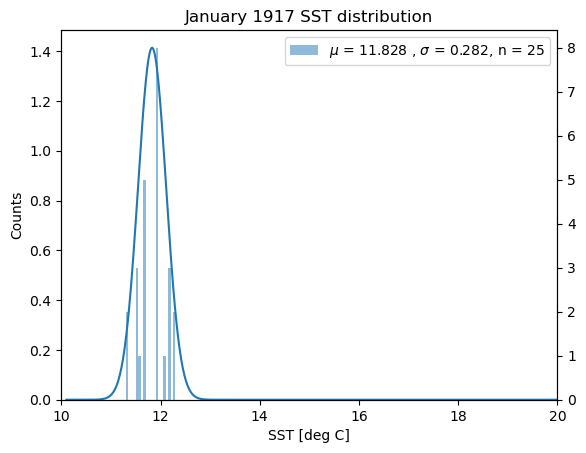

In [155]:
jan1917 = rm_nans(sst.iloc[np.argwhere((sst['MONTH'] == 1) & (sst['YEAR'] == 1917)).squeeze()]['SURF_TEMP_C'].values)
fig,ax = plt.subplots()
ax1 = ax.twinx()
plot_histgauss(ax,ax1,ssts,jan1917,label = r'$\mu$ = '+ str(round(np.mean(jan1917),3)) + ' , ' + r'$\sigma$ = ' + str(round(np.std(jan1917),3)) + ', n = ' + str(len(jan1917)),alpha = 0.5)
ax1.legend()
ax.set_xlim([10,20])
ax.set_title('January 1917 SST distribution');ax.set_xlabel('SST [deg C]');ax.set_ylabel('Counts');

First we need to know the degree of freedom. For this test, $$ DoF = n-1$$
We then use the degree of freedom and desired amount of confidence to look up the maximum number the t-value could be in order to accept or reject $\mu_0$ as the mean.

Usually we can use a lookup table or built in function to determine this maximum value. It comes from a [complicated PDF](https://en.wikipedia.org/wiki/Student%27s_t-distribution) suitably called the "Student's t distribution". But let's just use the python package function `scipy.stats.ttest_1samp` instead. It gives us a p-value for whether we can reject the null hypothesis (which is that the mean is equal to 14.4 deg C). Other coding languages will also most likely have a built in function for this. 

In [82]:
print('1917 January mean SST: ' + str(np.mean(jan1917)))
sc.stats.ttest_1samp(jan1917,popmean = 14.4)

1917 January mean SST: 11.828


TtestResult(statistic=-44.65564924672246, pvalue=1.2967666308174706e-24, df=24)

The null hypothesis of the test is that the mean is 14.4 deg C. Let's say we want to be 99% sure. Looking at the p-value, it is *well* below 0.01, meaning that we can *reject* the null hypothesis. So the January mean SST in the 1917 is most likely NOT from a distribution that has a mean of 14.4 deg C. The p-value is negative, so we can be 99% sure that it was colder back then. 

### How much and when did the mean change? - Two sample Student's t-test

Before, we wanted to know whether the mean of one sample is equal to some specific value. Now, let's find out whether the means of two samples are the same. So let's compare Januaries in the 1920s to the 2010s and ask whether they are the same. We can do this with a 2 sample Student's t-test. 

We need to make a few assumptions: 1. The samples are plausibly normally distributed, 2. The two samples have roughly the same standard deviation, and most importantly 3. The samples are independent. As we saw before, January temperatures look approximately normally distributed, given enough days. And each January is independent from the previous one. It's not clear whether the standard deviations are the same.

The t-value here is $$ t = \frac{\bar{x}_1 - \bar{x}_2}{s_p\sqrt{\frac{1}{n_1} + \frac{1}{n_2}}}$$ where $$s_p = \sqrt{\frac{(n_1 - 1)\sigma_1 + (n_2 - 1)\sigma_2}{n_1 + n_2 -2 }}$$
where $\bar{x}_1$,$\bar{x}_2$ are the mean values in each sample, $\sigma_1$,$\sigma_2$ are the standard deviations, and $n_1$,$n_2$ are the sample sizes. 

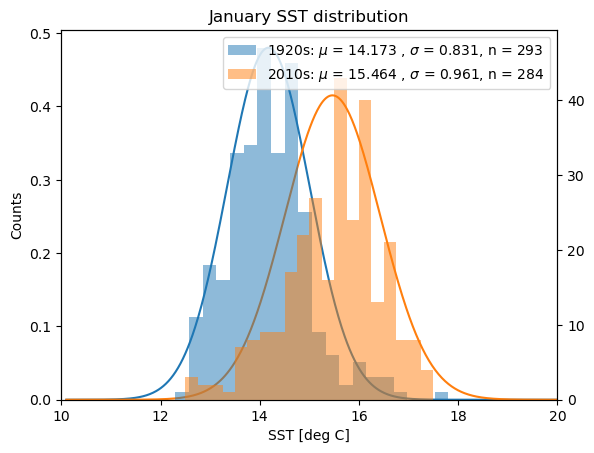

In [238]:
jan1920s = rm_nans(sst.iloc[np.argwhere((sst['MONTH'] == 1) & in_interval(sst['YEAR'],[1920,1929])).squeeze()]['SURF_TEMP_C'].values)
jan2010s = rm_nans(sst.iloc[np.argwhere((sst['MONTH'] == 1) & in_interval(sst['YEAR'],[2010,2019])).squeeze()]['SURF_TEMP_C'].values)

fig,ax = plt.subplots()
ax1 = ax.twinx()
plot_histgauss(ax,ax1,ssts,jan1920s,label = r'1920s: $\mu$ = '+ str(round(np.mean(jan1920s),3)) + ' , ' + r'$\sigma$ = ' + str(round(np.std(jan1920s),3)) + ', n = ' + str(len(jan1920s)),alpha = 0.5)
plot_histgauss(ax,ax1,ssts,jan2010s,label = r'2010s: $\mu$ = '+ str(round(np.mean(jan2010s),3)) + ' , ' + r'$\sigma$ = ' + str(round(np.std(jan2010s),3)) + ', n = ' + str(len(jan2010s)),alpha = 0.5)
ax1.legend()
ax.set_xlim([10,20])
ax.set_title('January SST distribution');ax.set_xlabel('SST [deg C]');ax.set_ylabel('Counts');

The standard deviation is a little bit bigger in the 2010s, but let's say that they are close enough for this test. Let's use a pre-made function again, `scipy.stats.ttest_ind`.

In [85]:
sc.stats.ttest_ind(jan1920s,jan2010s)

TtestResult(statistic=-17.25535507998279, pvalue=4.4983852755735795e-54, df=575.0)

The p-value is the probability of the two samples come from the tail ends of the same distribution. So it it'ss incredibly unlikely, and the two means are very different. 

Technically, our variances were not the same, so instead we can also use a version of the t-test that relaxes this assumption called the Welch's test. It gives the same statistic, but now the p-value is an order of magnitude bigger. Nowhere close to making us think that the two means are the same though! 

In [239]:
r = sc.stats.ttest_ind(jan1920s,jan2010s,equal_var = False)
print(r)

TtestResult(statistic=-17.216466796112798, pvalue=1.3673500416202044e-53, df=557.8551171602098)


Now what if I want to quantify how much each January differ from the statistics of the whole population over time. For each year, let's calculate how the statistics change. 

Because we have a p-value, we can also get a sense of how relevant each statistic is. If a year is close to the mean, we can show that. In this case, I chose to scale the size of the scatter point by the p-value. The smaller the p-value, the larger the size of the scatter point. The distributions and scatter points are also colored by year. The darker the color = more recent.

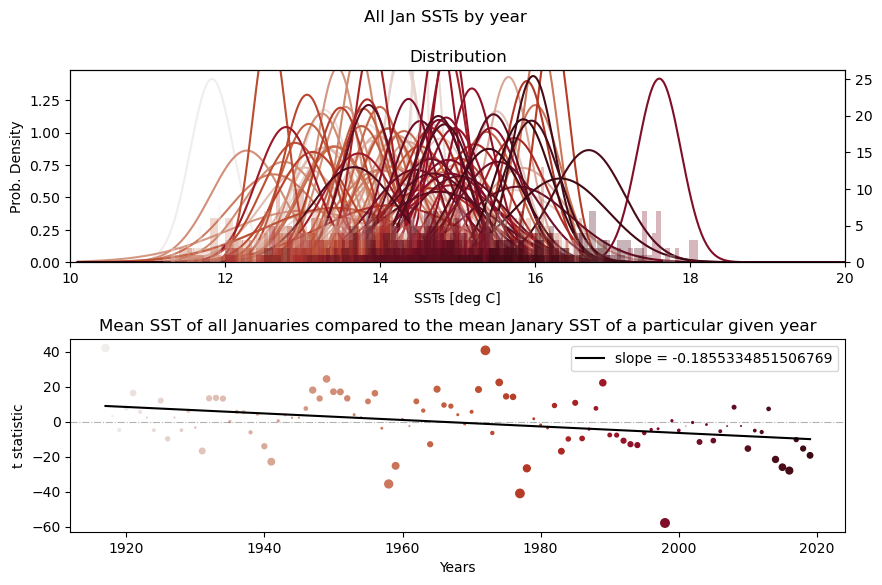

In [87]:
import cmocean.cm as cmo 
years = np.arange(1917,2020)
alljans = [rm_nans(sst.iloc[np.argwhere((sst['MONTH'] == 1)&(sst['YEAR'] == yr)).squeeze()]['SURF_TEMP_C'].values) for yr in years]
colors = cmo.amp(np.linspace(0, 1, len(alljans)))
fig,axs = plt.subplots(2,1,figsize = (10,6))
ax1 = axs[0].twinx();axs[0].set_xlim([10,20]);axs[0].set_xlabel('SSTs [deg C]');axs[0].set_ylabel('Prob. Density');axs[0].set_title('Distribution')
for i in range(len(alljans)):
    plot_histgauss(axs[0],ax1,ssts,alljans[i],label = str(years[i]),alpha = 0.3,color = colors[i])
tvals = [sc.stats.ttest_ind(jansst,alljans[i],equal_var = False).statistic for i in range(len(years))]
pvals = [100*sc.stats.ttest_ind(jansst,alljans[i],equal_var = False).pvalue for i in range(len(years))]
axs[1].scatter(years,tvals,c = colors,s = abs(np.log10(np.array(pvals))))
linfit = np.polyfit(years,np.asarray(tvals),1)
axs[1].plot(years, linfit[0]*years + linfit[1],color = 'k',label = 'slope = ' + str(linfit[0]));axs[1].legend();axs[1].set_ylabel('t statistic')
axs[1].set_xlabel('Years');axs[1].set_title('Mean SST of all Januaries compared to the mean Janary SST of a particular given year')
axs[1].axhline(alpha = 0.3,color = 'k',linewidth = 0.8,linestyle = '-.')
plt.suptitle('All Jan SSTs by year');
plt.subplots_adjust(hspace = 0.4)

So yeah... Things definitely did change over time compared to the overall statistic. Since the 1970s, the mean January SST over all time is much lower than the mean January SST for that year. How very curious... 

There is also a lot of interannual variabilities, some of which seem almost regular. That's interesting. Why do you think that is? 

Hint: check out things like the ENSO index, PDO, etc.

### Other tests 
Anyway, there's a lot more statistical tests out there in a similar vein. The details are beyond the scope of this lecture (note), mostly because it's getting past 2am and I'm tired. But hey, if you're running this notebook in Jupyter, you can keep playing around with this data. 

Two common ones you might encounter are the KS (Kolmogorov–Smirnov) test, and the Chi-squared test. Both of which are based on the same foundations we explored today (expected values, PDFs, standard deviations etc.), but they aren't just comparing the means, but rather the whole distribution. For example, if you were skeptical that the distribution of January SST was indeed normal, you can use one of these to find out. I actually shopped around the decades in that pier dataset to find ones that looked more normal. Some decades are funky, in particular ones where there were strong El Ninos (like the 1990s). So you could try to quantify that! 

The KS test asks if your distribution is the same as some theoretical *continuous* distribution. While the $\chi^2$ test is similar, but for discrete or binned data. Both of them are also probably built into whatever programming thing you're using.

Happy analyzing! 